In [1]:
from gidnet_qubit_reuse_algorithm.gidnet_qra import compute_qubit_reuse_sets, generate_dynamic_circuit

from biadu_qnet_qubit_reuse.baidu_qnet_qr import (modified_apply_qnet_qubit_reuse, 
                                                  compute_qnet_qubit_reuse_list, 
                                                  from_qiskit_to_qnet)
from helper_functions.benchmarks import generate_circ

def compute_qnet_qubit_reuse_list_timing(circ):
    qubit_reuse_list = modified_apply_qnet_qubit_reuse(circ, method="deterministic", draw=False)
    # qubit_reuse_list = merge_sublists(qubit_reuse_list)
    # qubit_reuse_list = finalize_qubit_reuse_list(qubit_reuse_list, circ.width)
    return qubit_reuse_list


import time

circuit_sizes = [16, 20, 25, 30, 36, 42, 49, 56, 64, 72, 81, 90, 100, 110, 121, 132, 144]

gidnet_average_time = []
gidnet_std_time = []
gidnet_qubit_width = []

gidnet_plus_average_time = []
gidnet_plus_std_time = []
gidnet_plus_qubit_width = []

qnet_average_time = []
qnet_std_time = []
qnet_qubit_width = []

for i, circuit_size in enumerate(circuit_sizes):
    print("circuit", i+1, "running")
    circuit_type = "supremacy"

    supremacy_circuit = generate_circ(
            num_qubits=circuit_size,
            depth=8,
            circuit_type=circuit_type,
            reg_name="q",
            connected_only=True,
            seed=None,
    )

    if supremacy_circuit is not None:
        supremacy_circuit.measure_all()


    #### GIDNET EXPERIMENT BEGINS #####
#     gidnet_time = %timeit -o compute_qubit_reuse_sets(supremacy_circuit)
#     gidnet_result = compute_qubit_reuse_sets(supremacy_circuit)

#     gidnet_average_time.append(gidnet_time.average)
#     gidnet_std_time.append(gidnet_time.stdev)
#     gidnet_qubit_width.append(len(gidnet_result))
    
    
    #### GIDNET+ EXPERIMENT BEGINS #####
    # TODO: TROUBLESHOOT maximize_circuit_depth, it doesn't work for circuit size 144
    gidnet_plus_time = %timeit -o compute_qubit_reuse_sets(supremacy_circuit, improved_gidnet=True, maximize_circuit_depth=False)
    gidnet_plus_result = compute_qubit_reuse_sets(supremacy_circuit, improved_gidnet=True,
                                                           maximize_circuit_depth=False)

    gidnet_plus_average_time.append(gidnet_plus_time.average)
    gidnet_plus_std_time.append(gidnet_plus_time.stdev)
    gidnet_plus_qubit_width.append(len(gidnet_plus_result))
    
    
    #### QNET EXPERIMENTS BEGIN #####
    # convert Qiskit circuit to QNET circuit type
#     qnet_supremacy_circuit = from_qiskit_to_qnet(supremacy_circuit)

#     qnet_time = %timeit -o compute_qnet_qubit_reuse_list_timing(qnet_supremacy_circuit)
#     qnet_result = compute_qnet_qubit_reuse_list(qnet_supremacy_circuit)

#     qnet_average_time.append(qnet_time.average)
#     qnet_std_time.append(qnet_time.stdev)
#     qnet_qubit_width.append(len(qnet_result))


circuit 1 running
29.6 ms ± 1.35 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
circuit 2 running
51.5 ms ± 1.37 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
circuit 3 running
112 ms ± 8.88 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
circuit 4 running
204 ms ± 25.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
circuit 5 running
374 ms ± 29.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
circuit 6 running
712 ms ± 34.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
circuit 7 running
1.37 s ± 67.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
circuit 8 running
2.02 s ± 78.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
circuit 9 running
4.35 s ± 893 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
circuit 10 running
5.44 s ± 321 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
circuit 11 running
9.08 s ± 303 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
circuit 12 running
15.6 s ± 450 ms per loop (me

In [2]:
import pandas as pd
# Convert lists to a dictionary
data = {
    'Circuit Sizes': circuit_sizes,
    'GidNET+ Average Runtime': gidnet_plus_average_time,  # Added comma
    'GidNET+ Stdev Runtime': gidnet_plus_std_time,  # Added comma
    'GidNET+ Width': gidnet_plus_qubit_width
}

# Assuming pandas is imported as pd
import pandas as pd

# Convert dictionary to DataFrame
df = pd.DataFrame(data)

# Save DataFrame to CSV
# df.to_csv('data_supremacy_cct/GidNET+_width_and_runtime_data.csv', index=False)
df.to_csv('GidNET+_width_and_runtime_data.csv', index=False)


In [4]:
# MERGE DATA FROM PREVIOUS EXPERIMENTS
import pandas as pd

# Load the two CSV files
# df1 = pd.read_csv('data_supremacy_cct/QNET_and_GidNET_width_and_runtime_data.csv')
# df2 = pd.read_csv('data_supremacy_cct/GidNET+_width_and_runtime_data.csv')

df1 = pd.read_csv('QNET_and_GidNET_width_and_runtime_data.csv')
df2 = pd.read_csv('GidNET+_width_and_runtime_data.csv')

# Merge the DataFrames on the "Circuit Sizes" column
merged_df = pd.merge(df1, df2, on="Circuit Sizes", how="outer")

# Save the merged DataFrame to a new CSV file
# merged_df.to_csv('data_supremacy_cct/merged_QNET_GidNET_and_GidNET+_width_and_runtime_data.csv', index=False)
merged_df.to_csv('merged_QNET_GidNET_and_GidNET+_width_and_runtime_data.csv', index=False)


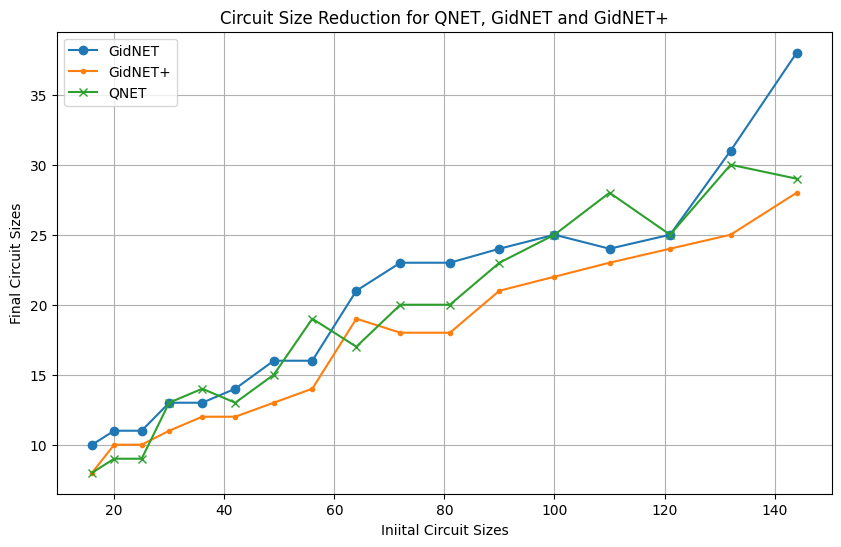

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the data
# data_path = 'data_supremacy_cct/merged_QNET_GidNET_and_GidNET+_width_and_runtime_data.csv'
data_path = 'merged_QNET_GidNET_and_GidNET+_width_and_runtime_data.csv'
df = pd.read_csv(data_path)

# Plotting the timing data
plt.figure(figsize=(10, 6))

# Plot for deterministic method
plt.plot(df["Circuit Sizes"], df["GidNET Width"], label='GidNET', marker='o')

plt.plot(df["Circuit Sizes"], df["GidNET+ Width"], label='GidNET+', marker='.')

# Plot for random method
plt.plot(df["Circuit Sizes"], df["QNET Width"], label='QNET', marker='x')

# Adding titles and labels
plt.title('Circuit Size Reduction for QNET, GidNET and GidNET+')
plt.xlabel('Iniital Circuit Sizes')
plt.ylabel('Final Circuit Sizes')
plt.legend()

# Show grid
plt.grid(True)

# Save figure to a file
# fig_path = 'QNET_runtime.png'
# fig_path = 'plots_supremacy_cct/merged_QNET_GidNET_and_GidNET+_initial_vs_final_circuit_sizes.pdf'
fig_path = 'merged_QNET_GidNET_and_GidNET+_initial_vs_final_circuit_sizes.pdf'
plt.savefig(fig_path)

# Display the plot
plt.show()



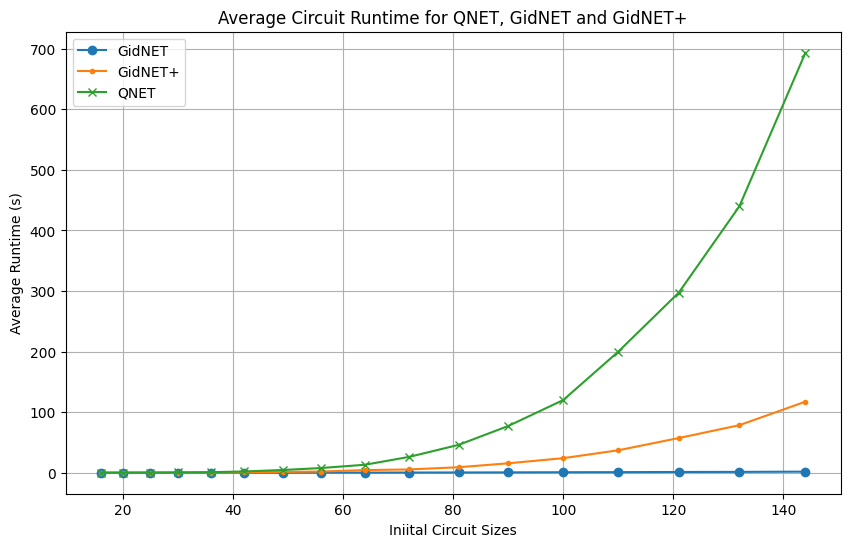

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the data
# data_path = 'data_supremacy_cct/merged_QNET_GidNET_and_GidNET+_width_and_runtime_data.csv'
data_path = 'merged_QNET_GidNET_and_GidNET+_width_and_runtime_data.csv'
df = pd.read_csv(data_path)

# Plotting the timing data
plt.figure(figsize=(10, 6))

# Plot for deterministic method
plt.plot(df["Circuit Sizes"], df["GidNET Average Runtime"], label='GidNET', marker='o')

plt.plot(df["Circuit Sizes"], df["GidNET+ Average Runtime"], label='GidNET+', marker='.')

# Plot for random method
plt.plot(df["Circuit Sizes"], df["QNET Average Runtime"], label='QNET', marker='x')

# Adding titles and labels
plt.title('Average Circuit Runtime for QNET, GidNET and GidNET+')
plt.xlabel('Iniital Circuit Sizes')
plt.ylabel('Average Runtime (s)')
plt.legend()

# Show grid
plt.grid(True)

# Save figure to a file
# fig_path = 'QNET_runtime.png'
# fig_path = 'plots_supremacy_cct/merged_QNET_GidNET_and_GidNET+_initial_circuit_sizes_vs_average_runtime.pdf'
fig_path = 'merged_QNET_GidNET_and_GidNET+_initial_circuit_sizes_vs_average_runtime.pdf'
plt.savefig(fig_path)

# Display the plot
plt.show()



In [1]:
#!/usr/bin/python3
# -*- coding: utf-8 -*-
#
# Copyright (c) 2022 Baidu, Inc. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

r"""
Numerical experiment of the GRCS circuit.
"""

import os
from math import pi
from Extensions.QuantumNetwork.qcompute_qnet.quantum.circuit import Circuit

directory_path = "../data"

# Set the range for the number of cycles
min_cycle = 10
# max_cycle = 67
max_cycle = 15

# Set the range for the number of qubits
# circuit_size = ["4x4", "4x5", "5x5", "5x6", "6x6", "6x7", "7x7", "7x8", "8x8", "8x9",
#                 "9x9", "9x10", "10x10", "10x11", "11x11", "11x12", "12x12"]
circuit_size = ["5x5", "5x6"]

for qubit_num in circuit_size:
    folder_path = os.path.join(directory_path, qubit_num)
    for cycle_num in range(min_cycle, max_cycle + 1):
        inst_name = "inst_" + qubit_num + "_" + str(cycle_num) + "_0.txt"
        inst_path = os.path.join(folder_path, inst_name)

        input_cir = []
        with open(inst_path, "r") as file:
            for line in file:
                input_cir.append(list(line.strip("\n").split(" ")))

        # Create a quantum circuit
        cir = Circuit()

        # Construct the quantum circuit
        for gate in input_cir[1:]:
            if gate[1] == "h":
                cir.h(int(gate[2]))
            elif gate[1] == "cz":
                cir.cz([int(gate[2]), int(gate[3])])
            elif gate[1] == "t":
                cir.t(int(gate[2]))
            elif gate[1] == "x_1_2":
                cir.rx(int(gate[2]), pi / 2)
            elif gate[1] == "y_1_2":
                cir.ry(int(gate[2]), pi / 2)
            else:
                raise NotImplementedError

        # Measure all qubits
        cir.measure()
        original_width = cir.width

        # Apply random greedy heuristic algorithm to compile the circuit
        cir.reduce(method="random_greedy", shots=10)
        compiled_width = cir.width

        # Calculate the reducibility factor
        reducibility_factor = 1 - compiled_width / original_width

        # Print the result
        print(
            "circuit instance:",
            inst_name,
            "\n" "original circuit width:",
            original_width,
            "\n" "compiled circuit width:",
            compiled_width,
            "\n" "reducibility factor:",
            reducibility_factor,
        )

circuit instance: inst_5x5_10_0.txt 
original circuit width: 25 
compiled circuit width: 12 
reducibility factor: 0.52
circuit instance: inst_5x5_11_0.txt 
original circuit width: 25 
compiled circuit width: 12 
reducibility factor: 0.52
circuit instance: inst_5x5_12_0.txt 
original circuit width: 25 
compiled circuit width: 12 
reducibility factor: 0.52
circuit instance: inst_5x5_13_0.txt 
original circuit width: 25 
compiled circuit width: 14 
reducibility factor: 0.43999999999999995
circuit instance: inst_5x5_14_0.txt 
original circuit width: 25 
compiled circuit width: 14 
reducibility factor: 0.43999999999999995
circuit instance: inst_5x5_15_0.txt 
original circuit width: 25 
compiled circuit width: 15 
reducibility factor: 0.4
circuit instance: inst_5x6_10_0.txt 
original circuit width: 30 
compiled circuit width: 12 
reducibility factor: 0.6
circuit instance: inst_5x6_11_0.txt 
original circuit width: 30 
compiled circuit width: 12 
reducibility factor: 0.6
circuit instance: ins

In [3]:
import re

def evaluate_expression(expression):
    # Use regular expression to find numbers in the format "number x number"
    match = re.match(r"(\d+)x(\d+)", expression)
    if match:
        # Extract the numbers
        num1, num2 = map(int, match.groups())
        # Perform multiplication
        return num1 * num2
    else:
        raise ValueError("Invalid format")

# Example usage
input_string = "4x4"
result = evaluate_expression(input_string)
print(result)  # Output: 16


16


In [9]:
import ast
import operator

def safe_eval(expr):
    """
    Safely evaluate a simple arithmetic expression using Abstract Syntax Trees (AST).

    This function provides a safe alternative to the built-in eval() function, which can execute arbitrary code.
    Instead, it parses a mathematical expression into an AST and only allows specific operations, thus preventing
    the execution of unsafe code.

    Parameters:
    expr (str): A string representing a simple arithmetic expression, such as "4*4" or "4x4".

    Returns:
    int or float: The result of the evaluated expression.

    Raises:
    ValueError: If the expression contains any operators or constructs that are not explicitly allowed.

    Example:
    >>> safe_eval("4x4")
    16
    >>> safe_eval("3*3")
    9

    Note:
    The function currently supports only multiplication, but can be extended to include additional operations
    by modifying the `allowed_operators` dictionary.
    """

    # Replace 'x' with '*' to standardize the multiplication symbol in the expression
    expr = expr.replace('x', '*')

    # Parse the expression into an AST
    tree = ast.parse(expr, mode='eval')

    # Define allowed operations using a dictionary mapping AST operator types to Python's operator functions
    allowed_operators = {ast.Mult: operator.mul}
    
    # Visitor class to evaluate the AST; it restricts operations to those specified in `allowed_operators`
    class Evaluator(ast.NodeVisitor):
        def visit_BinOp(self, node):
            """Visit binary operations and ensure they are allowed."""
            if type(node.op) in allowed_operators:
                return allowed_operators[type(node.op)](self.visit(node.left), self.visit(node.right))
            raise ValueError("Unsupported operator: {}".format(ast.dump(node.op)))

        def visit_Num(self, node):
            """Return the value of a number node."""
            return node.n

        def visit_Expr(self, node):
            """Evaluate and return the expression value."""
            return self.visit(node.value)

    # Instantiate the evaluator and evaluate the parsed AST
    return Evaluator().visit(tree.body)

# Example usage:
result = safe_eval("4x4")
print("The result is:", result)


The result is: 16


In [50]:
def create_qiskit_and_qnet_GRCS_circuits(num_qubits, cycle_num = 13, directory_path="../data"):
    """
    Generates Google Random Circuit Sampling (GRCS) circuits for both Qiskit and QNET based on stored 
    instruction files.

    Parameters:
    - num_qubits (str): Number of qubits for the GRCS circuit as a string, used for file naming conventions.
    - cycle_num (int): Specifies the cycle number which influences the file to be loaded.
    - directory_path (str): The path to the directory where circuit instruction files are stored.

    Returns:
    - tuple: A tuple containing two elements; the first is a Qiskit circuit and the second is a QNET circuit.
    """

    import os
    from math import pi
    from Extensions.QuantumNetwork.qcompute_qnet.quantum.circuit import Circuit
    from qiskit import QuantumCircuit

    # for qubit_num in circuit_size:
    folder_path = os.path.join(directory_path, num_qubits)
    inst_name = "inst_" + num_qubits + "_" + str(cycle_num) + "_0.txt"
    inst_path = os.path.join(folder_path, inst_name)

    input_cir = []
    with open(inst_path, "r") as file:
        for line in file:
            input_cir.append(list(line.strip("\n").split(" ")))

    # Create a QNET quantum circuit
    qnet_circuit = Circuit()

    # # Construct the QNET quantum circuit based on the instruction set
    for gate in input_cir[1:]:
        if gate[1] == "h":
            qnet_circuit.h(int(gate[2]))
        elif gate[1] == "cz":
            qnet_circuit.cz([int(gate[2]), int(gate[3])])
        elif gate[1] == "t":
            qnet_circuit.t(int(gate[2]))
        elif gate[1] == "x_1_2":
            qnet_circuit.rx(int(gate[2]), pi / 2)
        elif gate[1] == "y_1_2":
            qnet_circuit.ry(int(gate[2]), pi / 2)
        else:
            raise NotImplementedError

    # Measure all qubits
    qnet_circuit.measure()


    # Create a QISKIT quantum circuit
    qiskit_circuit = QuantumCircuit(int(safe_eval(num_qubits)))

    ## Construct the Qiskit quantum circuit using the same instructions
    for gate in input_cir[1:]:
        if gate[1] == "h":
            qiskit_circuit.h(int(gate[2]))
        elif gate[1] == "cz":
            qiskit_circuit.cz(int(gate[2]), int(gate[3]))
        elif gate[1] == "t":
            qiskit_circuit.t(int(gate[2]))
        elif gate[1] == "x_1_2":
            qiskit_circuit.rx(pi / 2, int(gate[2]))
        elif gate[1] == "y_1_2":
            qiskit_circuit.ry(pi / 2, int(gate[2]))
        else:
            raise NotImplementedError

    # Measure all qubits
    qiskit_circuit.measure_all()
    
    return qiskit_circuit, qnet_circuit
    
    

In [52]:
directory_path = "../data"

num_qubits = "4x4"
cycle_num = 13


qiskit_circuit, qnet_circuit = create_qiskit_and_qnet_GRCS_circuits(num_qubits, cycle_num, directory_path)

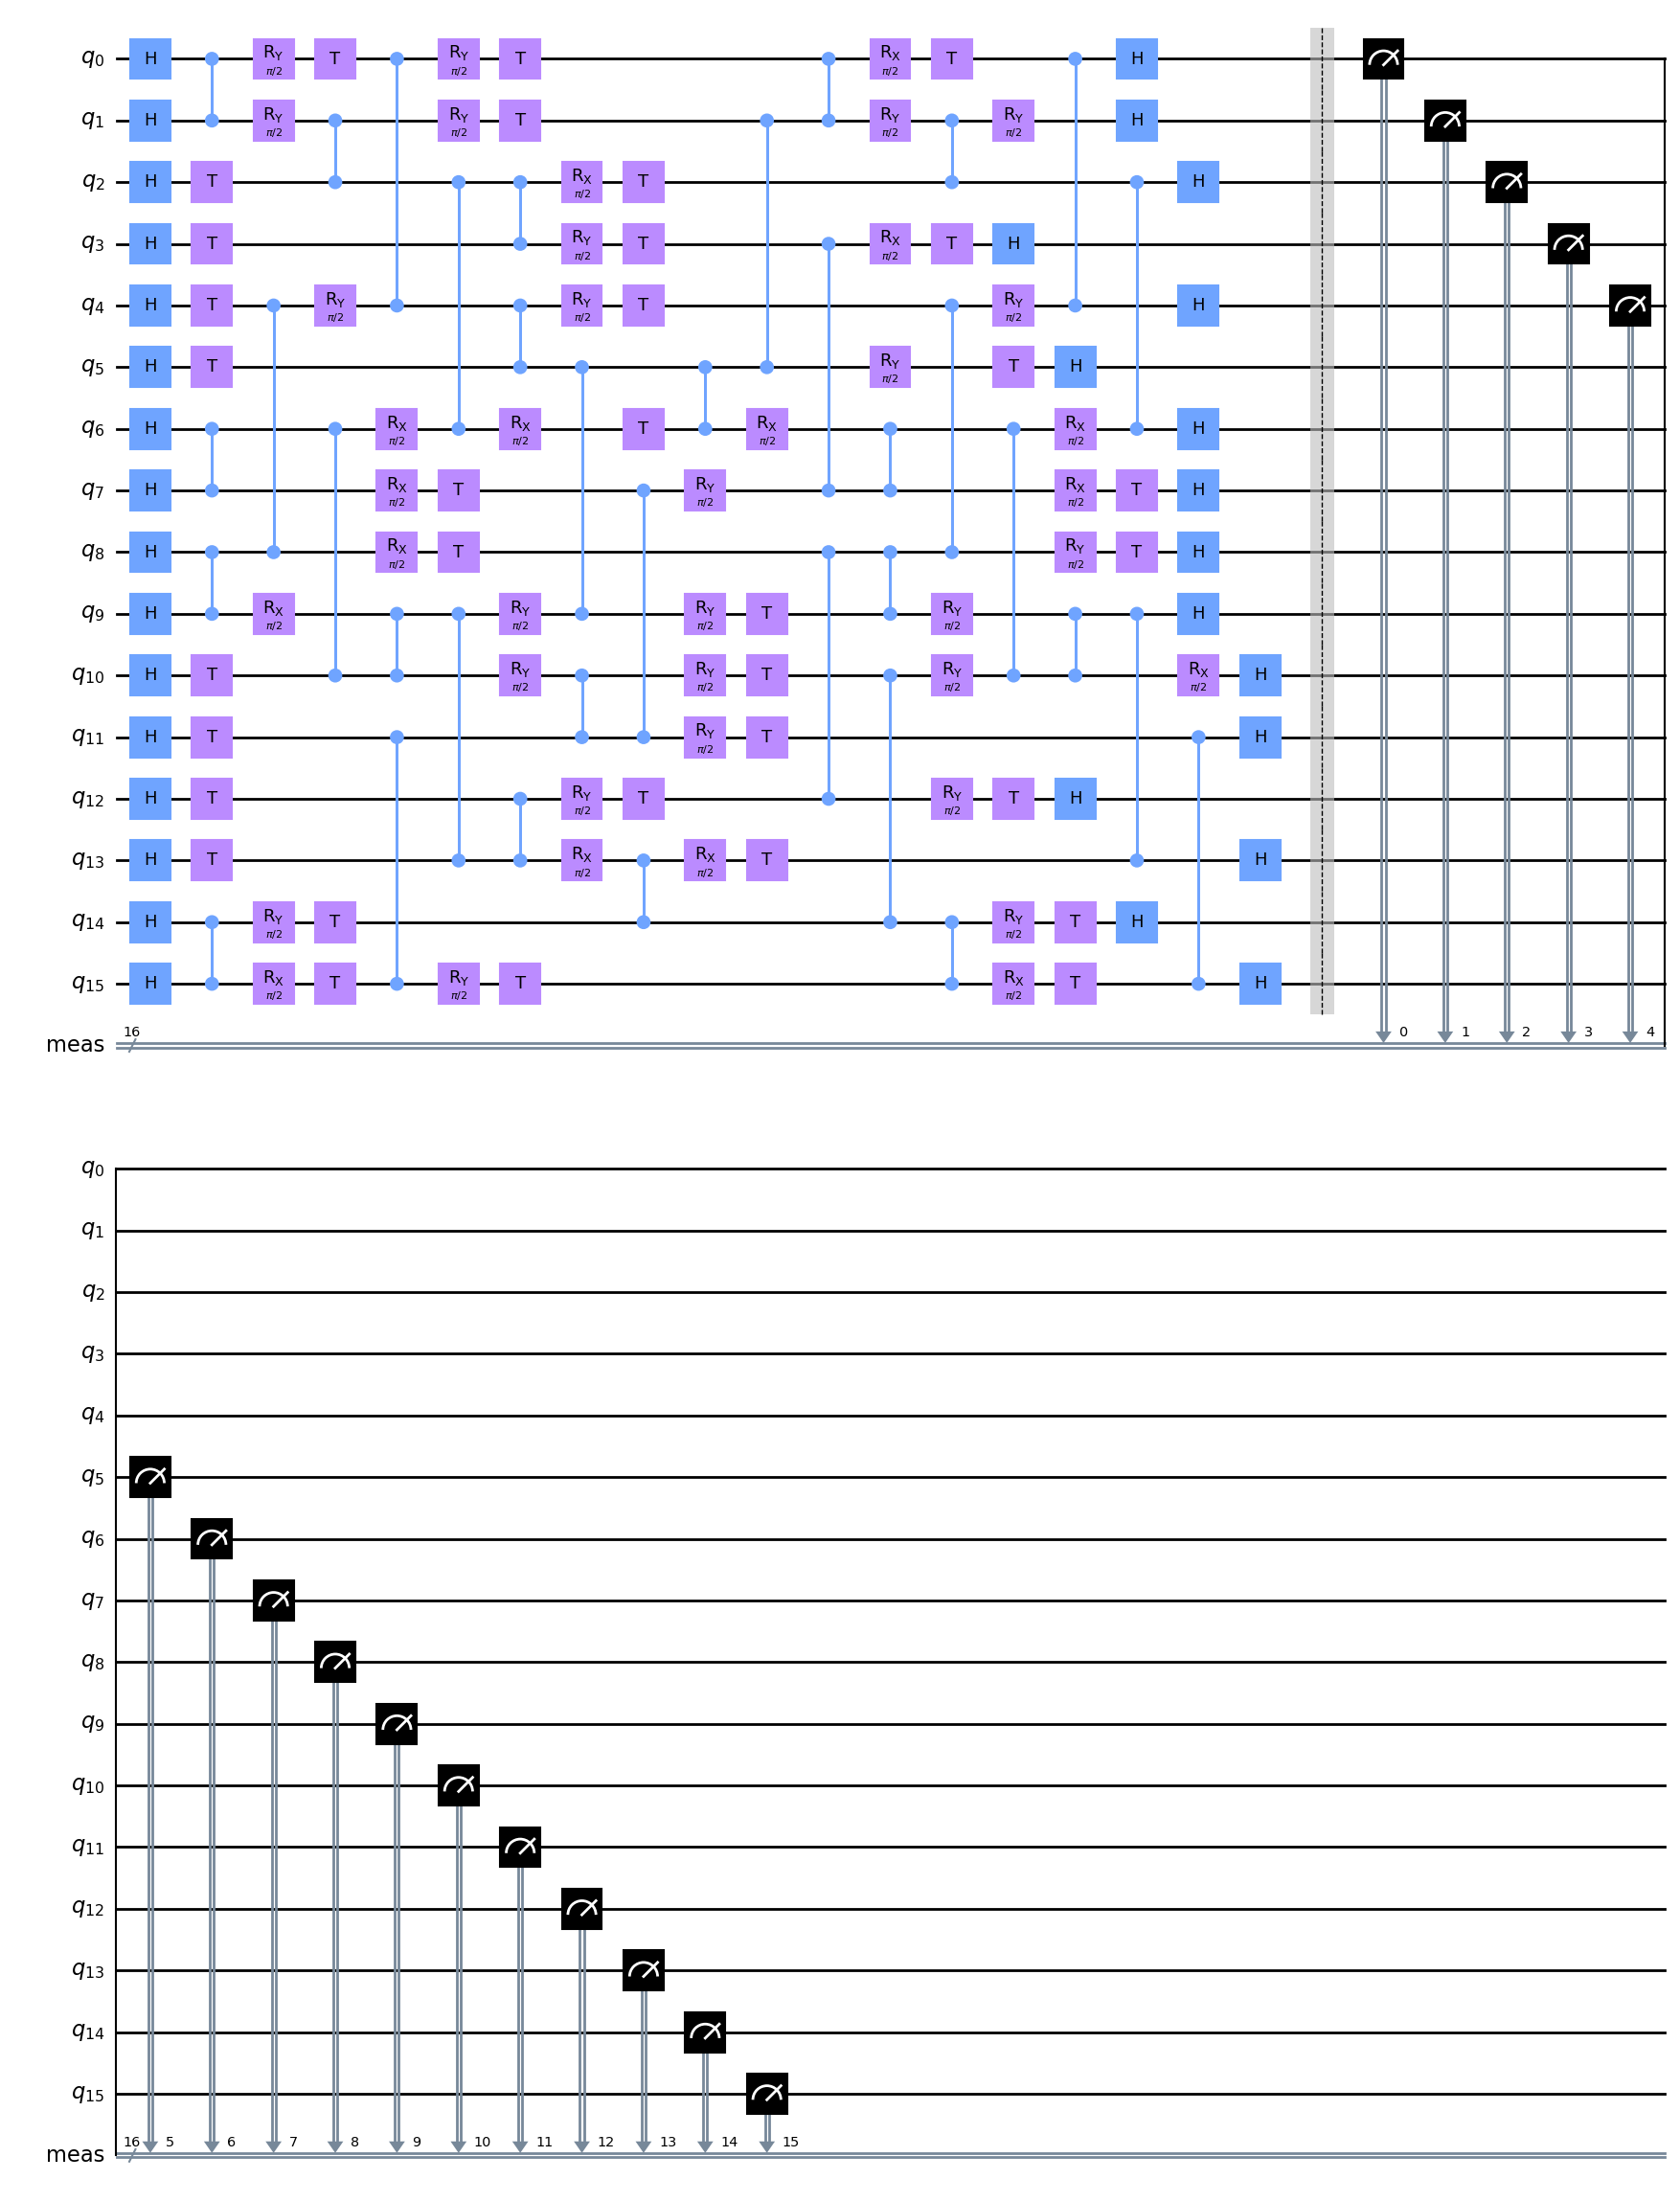

In [53]:
qiskit_circuit.draw("mpl")